In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instructions
1. We will be conducting the entire assignment through this notebook. You will be entering your code in the cells provided, and any explanation and details asked in markdown cells. 
2. You are free to add more code and markdown cells for describing your answer, but make sure they are below the question asked and not somewhere else. 
3. The notebook needs to be submitted on LMS. You can find the submission link [here](https://lms.iiitb.ac.in/moodle/mod/assign/view.php?id=13932). 
4. The deadline for submission is **5th October, 2020 11:59PM**.

# Data import
The data required for this assignment can be downloaded from the following [link](https://www.kaggle.com/dataset/e7cff1a2c6e29e18684fe6b077d3e4c42f9a7ae6199e01463378c60fe4b4c0cc), it's hosted on kaggle. Do check directory paths on your local system.  

In [2]:
alcdata = pd.read_csv("alcoholism/student-mat.csv")
fifadata = pd.read_csv("fifa18/data.csv")
accident1 = pd.read_csv("accidents/accidents_2005_to_2007.csv")
accident2 = pd.read_csv("accidents/accidents_2009_to_2011.csv")
accident3 = pd.read_csv("accidents/accidents_2012_to_2014.csv")

C:\Users\shivam\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Part - 1
## Alcohol Consumption Data
The following data was obtained in a survey of students' math course in secondary school. It contains a lot of interesting social, gender and study information about students. 


### 1. Try to visualize correlations between various features and grades and see which features have a significant impact on grades. 
Try to engineer the three grade parameters (G1, G2 and G3) as one feature for such comparisons.



In [4]:
# Display the original data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(alcdata.head(5))
print(alcdata.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [5]:
#Remove school column since it contain same value for all rows so it wont have any effect on result
alcdata.drop(columns = 'school', inplace = True)
print(alcdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

In [6]:
# Calcuating average of G1,G2,G3
alcdata['G_avg'] = alcdata['G1']/3 + alcdata['G2']/3 + alcdata['G3']/3
alcdata

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667
5,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,15.000000
6,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,11.666667
7,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,5.666667
8,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,17.666667
9,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,14.666667


In [7]:
#Dropping G1,G2,G3
alcdata.drop(columns = ['G1','G2','G3'], inplace = True)
alcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   address     395 non-null    object 
 3   famsize     395 non-null    object 
 4   Pstatus     395 non-null    object 
 5   Medu        395 non-null    int64  
 6   Fedu        395 non-null    int64  
 7   Mjob        395 non-null    object 
 8   Fjob        395 non-null    object 
 9   reason      395 non-null    object 
 10  guardian    395 non-null    object 
 11  traveltime  395 non-null    int64  
 12  studytime   395 non-null    int64  
 13  failures    395 non-null    int64  
 14  schoolsup   395 non-null    object 
 15  famsup      395 non-null    object 
 16  paid        395 non-null    object 
 17  activities  395 non-null    object 
 18  nursery     395 non-null    object 
 19  higher      395 non-null    o

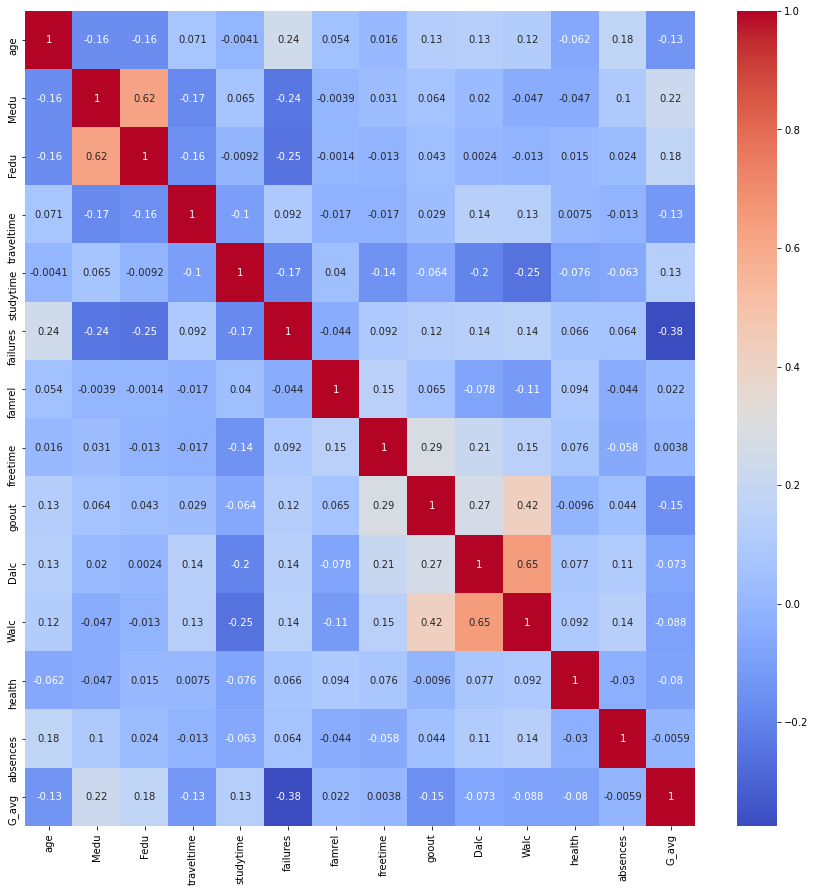

In [8]:
# plotting heatmap to show correlation among features
corr = alcdata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

In [9]:
# sorting correlation value in decreasing order
Most_Correlated = alcdata.corr().abs()['G_avg'].sort_values(ascending=False)
Most_Correlated.head

<bound method NDFrame.head of G_avg         1.000000
failures      0.375759
Medu          0.224260
Fedu          0.175852
goout         0.154511
age           0.134589
studytime     0.134565
traveltime    0.128197
Walc          0.088025
health        0.080380
Dalc          0.072508
famrel        0.021653
absences      0.005909
freetime      0.003773
Name: G_avg, dtype: float64>

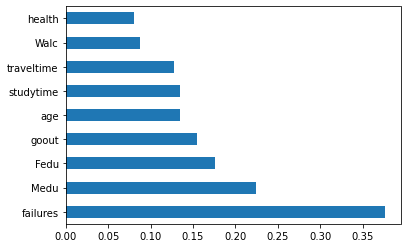

In [10]:
# plotting graph to show upto what extent features have effect on grade
top_features = Most_Correlated[1:10]
ax = top_features.plot.barh(stacked=True)

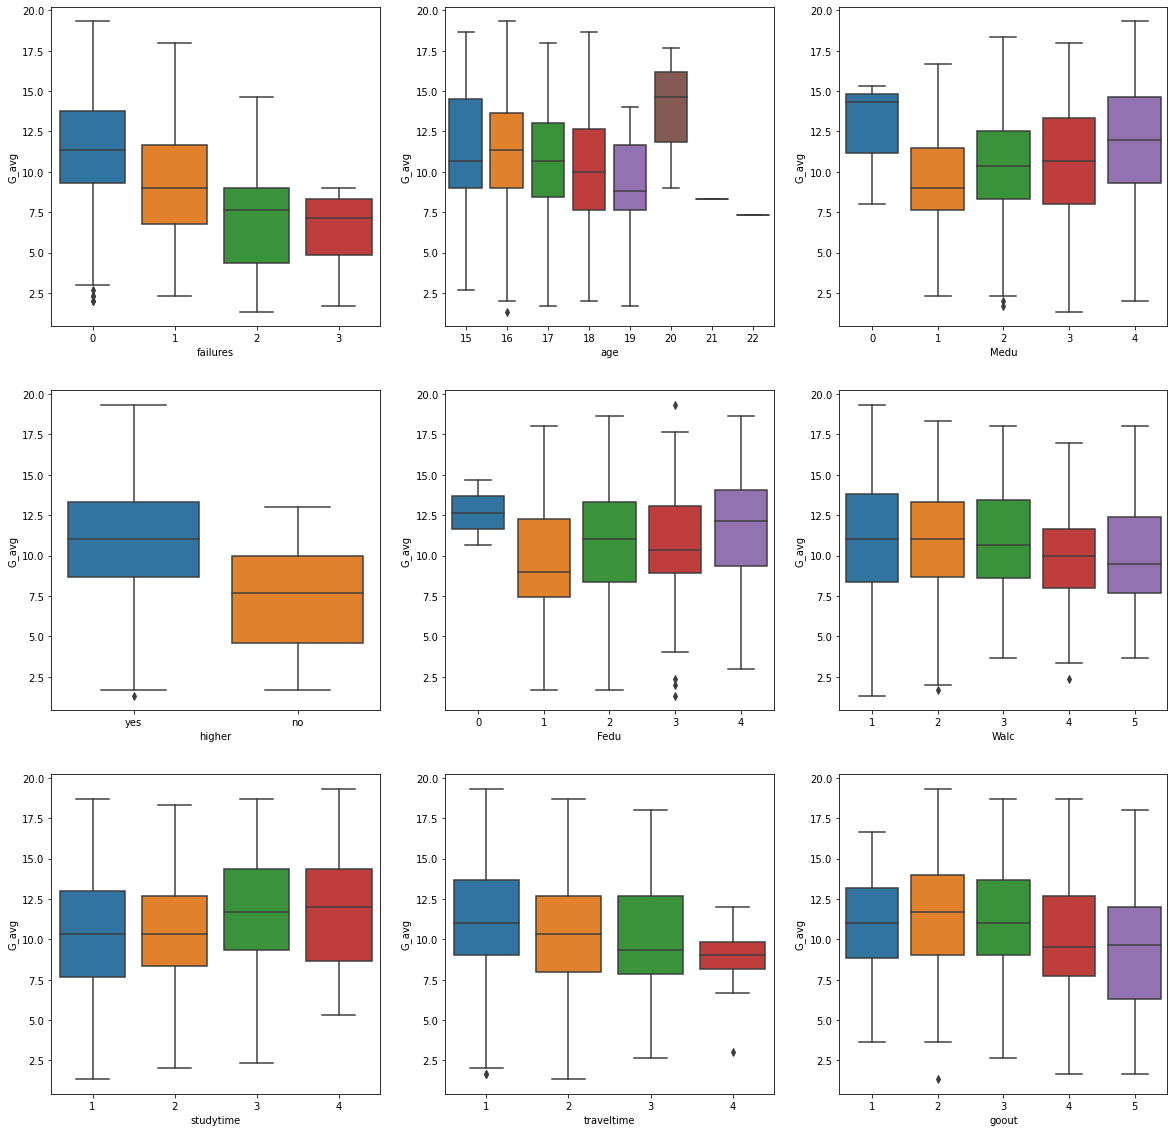

In [11]:
# plotting boxplot to show how some top  features effects grades
def make_scatter(df):
    features = ('failures', 'age', 'Medu', 'higher','Fedu','Walc', 'studytime', 'traveltime', 'goout')

    for index, col in enumerate(features):
        plt.subplot(3, 3, index+1)
        ax = sns.boxplot(x = col, y = 'G_avg', data = alcdata)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.2)

make_scatter(alcdata)

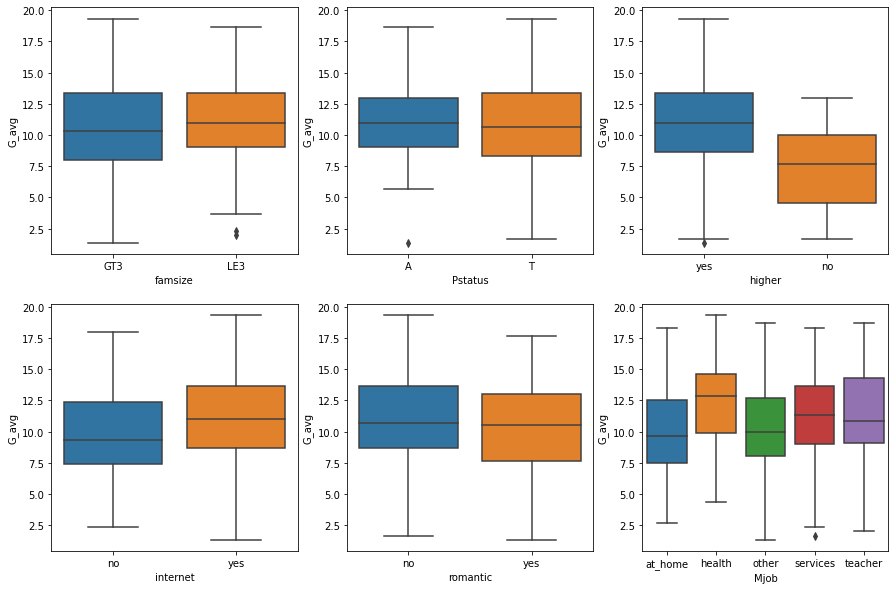

In [12]:
# plotting boxplot to show how some top categorical features effects grades
def make_scatter(df):    
    features = ('famsize', 'Pstatus','higher', 'internet', 'romantic','Mjob')
    for index, col in enumerate(features):
        plt.subplot(2, 3, index+1)
        ax = sns.boxplot(x = col, y = 'G_avg', data = alcdata)

plt.figure(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.2)

make_scatter(alcdata)

solution - From the above visualization we can conclude that features [failures, Medu,higher, Fedu, goout, age, studytime, traveltime, Walc, health, Dalc ] have a high impact on grades of students


### 2. If there is a need for encoding some of the features,  how would you go  about it? 
Would you consider combining certain encodings together ?


Yes, there is a need to encode some features since our data contains categorical features which need to be encoded for
better visualization.  for encoding we can use label encoding for categorical features containing 2  different values
and use one hot encoding for categorical features containing more than two  different values.

In [ ]:
# copying original data
alcdata1 = alcdata.copy()
alcdata1.head

In [ ]:
# checking datatypes of attributes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(alcdata.dtypes)
category_data = alcdata.select_dtypes(include=['object'])
print(category_data.head(10))

In [ ]:
##label Encoding
# these features contains only two values hence we can perform label encoding
features = ('sex', 'famsize', 'Pstatus','guardian','schoolsup','famsup','paid','activities','nursery',
       'higher', 'internet', 'romantic','address')
from sklearn import preprocessing
for f in features:
    if alcdata[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(alcdata[f].values))
        alcdata[f] = lbl.transform(list(alcdata[f].values)) 
alcdata.dtypes

In [ ]:
## ONE HOT ENCODING
# using one hot encoding for data containg more than two features
def encode(alcdata, feature):
    dummies = pd.get_dummies(alcdata[[feature]])
    res= pd.concat([alcdata, dummies], axis=1)
    return res
features_to_encode = ['Mjob', 'Fjob', 'reason']
for feature in features_to_encode:
    alcdata = encode(alcdata, feature)
    
alcdata.drop(['Mjob','Fjob','reason'] ,axis =1,inplace = True)

In [ ]:
alcdata.shape


### 3. Try to find out how family relation(famrel) and parents cohabitation(Pstatus) affect grades of students. 


In [ ]:
#creating a subset of original data
New_Data = alcdata[['famrel', 'Pstatus', 'G_avg']]
New_Data.corr()

In [ ]:
# finding mean of grades of students group by famrel
alcdata[['famrel','G_avg']].groupby(['famrel']).mean()

In [ ]:
#Family Relation
#plotting graph 
b = sns.swarmplot(x=alcdata['famrel'],y=alcdata['G_avg'])
b.axes.set_title('family realtion has very less impact on grades', fontsize = 30)
b.set_xlabel('famrel', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

From the above visualization and mean calcuation we can see that family realtion has very minimal effect on grades

In [ ]:
# finding mean of grades of students group by Pstatus
alcdata[['Pstatus','G_avg']].groupby(['Pstatus']).mean()

In [ ]:
#PStatus
b = sns.swarmplot(x=alcdata['Pstatus'],y=alcdata['G_avg'])
b.axes.set_title('Student whose parent lives apart generally scores higher', fontsize = 30)
b.set_xlabel('Pstatus', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

From the above visualization and mean calcuation we can see that pstatus  has a significant effect on grades for students whose parents live apart generally scores higher. 



### 4. Figure out which features in the data are skewed, and propose a way to remove skew from all such columns. 

In [ ]:
# using plots we can see skewed features are features which are alligned towards left or right
alcdata1.hist(bins=20, figsize=(20,15))
plt.show()

From the above visualization we can see the features [traveltime, studytime,absences,age] are skewed .so to remove skewness we can use log transformations on these features

In [ ]:
#removing skewness using log transformation
# removing skewness of features containing continous values
def make_scatter(df): 
    skew = ('age','absences','traveltime','studytime')
    
    for index, col in enumerate(skew):
        plt.subplot(3, 2, index+1)
        print(col)
        print(alcdata1[col].skew())
        plot = plt.hist(np.log(alcdata1[col]+1),bins=20,label = 'col')
        plt.xlabel(col)
        print(np.log(alcdata1[col]+1).skew())

plt.figure(figsize = (15,10))
plt.subplots_adjust(hspace = 0.3)

make_scatter(alcdata1)

# Part - 2
## FIFA 2019  Data


### 1. Which clubs are the most economical? How did you decide that?

To find the most econonmical club i am taking wages and overall into consideration and before calcuating anything we need to normalize these feild so that they can have values on same scale and effect of both the attribute to predict economical clubs is same. 

To find the most economical club what i did is calcuate ratio of wages(total amount to player) and overall(rating)of palyerfor each club.
The club which will less wage and more rating  will be the most economical [eq -(wage/overall)] so from the (eq) we can see that we need to sort ratio in ascending order  because less ratio implies less wage and more overall.

In [3]:
fifadata1 = fifadata.copy()

In [4]:
print(fifadata.info())
print(fifadata.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
#checking null value percentage in each column
null_var = fifadata.isnull().sum()/fifadata.shape[0] *100
print(null_var)

Unnamed: 0        0.000000
ID                0.000000
Name              0.000000
Age               0.000000
Photo             0.000000
                    ...   
GKHandling        0.263635
GKKicking         0.263635
GKPositioning     0.263635
GKReflexes        0.263635
Release Clause    8.590103
Length: 89, dtype: float64


In [6]:
#columns have null value percentage greater than 10
drop_columns  = null_var[null_var >10].keys()
drop_columns

Index(['Loaned From', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

In [7]:
#dropping columns have null value percentage>10
fifadata=fifadata.drop(columns=drop_columns)
fifadata.shape

(18207, 62)

In [8]:
#dropping rows conataing null values
fifadata.dropna(inplace = True)
fifadata.shape

(16643, 62)

In [9]:
# converting the data into int
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

fifadata['Value_int'] = fifadata['Value'].apply(value_to_int)
fifadata['Wage_int'] = fifadata['Wage'].apply(value_to_int)
fifadata['Release_Clause_int'] = fifadata['Release Clause'].apply(value_to_int)

In [10]:
#dropping the data for which conversion has been done
fifadata.drop(columns = ['Wage','Value','Release Clause'], inplace = True)
fifadata.shape

(16643, 62)

In [11]:
# normalizing the values of release clause and overall so that they can be represented on same scale
from sklearn import preprocessing
wage_array = np.array(fifadata['Wage_int'])
overall_array = np.array(fifadata['Overall'])
normalized_wage = preprocessing.normalize([wage_array])
normalized_overall = preprocessing.normalize([overall_array])

In [12]:
# reshape data
nor_wage  = normalized_wage.reshape(16643,1)
nor_overall  = normalized_overall.reshape(16643,1)
print(nor_overall)

[[0.01095155]
 [0.01095155]
 [0.01071854]
 ...
 [0.00547578]
 [0.00547578]
 [0.00535927]]


In [13]:
# adding normalized data to our data
fifadata['nor_wage'] = nor_wage
fifadata['nor_overall'] = nor_overall
print(fifadata.nor_wage)
print(fifadata.nor_overall)

0        0.180589
1        0.129449
2        0.092692
3        0.083103
4        0.113468
           ...   
18202    0.000320
18203    0.000320
18204    0.000320
18205    0.000320
18206    0.000320
Name: nor_wage, Length: 16643, dtype: float64
0        0.010952
1        0.010952
2        0.010719
3        0.010602
4        0.010602
           ...   
18202    0.005476
18203    0.005476
18204    0.005476
18205    0.005476
18206    0.005359
Name: nor_overall, Length: 16643, dtype: float64


In [14]:
#calcauting ratio 
fifadata['ratio'] = fifadata['nor_wage']/fifadata['nor_overall']
fifadata.head

<bound method NDFrame.head of        Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/19

In [15]:
#groping data by club and adding ratio values the club which will have least value will be most economical
economical_clubs = fifadata.groupby(['Club'])['ratio'].sum().sort_values(ascending=True)
most_economical = economical_clubs.head(10)

In [16]:
#top 10 most economical clubs
most_economical

Club
Sangju Sangmu FC        0.636430
Derry City              0.841918
Dalkurd FF              0.923955
Sligo Rovers            0.925032
Viktoria Plzeň          0.953939
Limerick FC             0.958885
Atlético Bucaramanga    0.963469
Shamrock Rovers         1.009111
Spartak Moscow          1.016513
PAOK                    1.026810
Name: ratio, dtype: float64

### 2. What is the relationship between age and individual potential of the player? How does age influence the players' value? At what age does the player exhibit peak pace ?

In [18]:
New_Data = fifadata[['Age', 'Potential', 'Value_int']]
New_Data.corr()

,Age,Potential,Value_int
Age,1.000000,-0.236762,0.076475
Potential,-0.236762,1.000000,0.585352
Value_int,0.076475,0.585352,1.000000


From the above correlation matrix we can see age and potential are negatively correlated which signifies lesser the age more is the potential. 

In [19]:
fifadata.Name.value_counts().head(10)

J. Rodríguez    9
Paulinho        7
Felipe          6
J. Williams     6
J. Gómez        6
J. Valencia     6
J. Murillo      5
J. Jones        5
A. Traoré       5
D. Williams     5
Name: Name, dtype: int64

In [20]:
# selecting rows where player name are from list
names = ['J. Rodríguez','Paulinho','J. Williams','Felipe','J. Valencia','J. Gómez','A. Traoré','D. Williams','J. Jones','R. Williams'] 
data = fifadata.loc[fifadata['Name'].isin(names)]
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_int,Wage_int,Release_Clause_int,nor_wage,nor_overall,ratio
175,175,207863,Felipe,29,https://cdn.sofifa.org/players/4/19/207863.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,83,FC Porto,...,11.0,14.0,9.0,7.0,20000000.0,22000.0,40000000.0,0.007032,0.009670,0.727177
1155,1155,216531,Paulinho,25,https://cdn.sofifa.org/players/4/19/216531.png,Portugal,https://cdn.sofifa.org/flags/38.png,77,79,SC Braga,...,14.0,8.0,15.0,11.0,11000000.0,16000.0,22800000.0,0.005114,0.008971,0.570066
1571,1571,768,Felipe,33,https://cdn.sofifa.org/players/4/19/768.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,SPAL,...,6.0,8.0,9.0,5.0,2700000.0,13000.0,4900000.0,0.004155,0.008738,0.475530
1817,1817,207734,Paulinho,23,https://cdn.sofifa.org/players/4/19/207734.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,82,Portimonense SC,...,14.0,14.0,11.0,8.0,9500000.0,9000.0,21900000.0,0.002877,0.008738,0.329213
2212,2212,223816,J. Rodríguez,24,https://cdn.sofifa.org/players/4/19/223816.png,Uruguay,https://cdn.sofifa.org/flags/60.png,74,79,Santos Laguna,...,14.0,10.0,7.0,10.0,7500000.0,18000.0,13300000.0,0.005753,0.008621,0.667323
2395,2395,226203,J. Jones,26,https://cdn.sofifa.org/players/4/19/226203.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,74,74,SV Darmstadt 98,...,9.0,15.0,9.0,7.0,6000000.0,18000.0,9600000.0,0.005753,0.008621,0.667323
2674,2674,211489,J. Gómez,28,https://cdn.sofifa.org/players/4/19/211489.png,Argentina,https://cdn.sofifa.org/flags/52.png,73,73,Al Fayha,...,14.0,10.0,10.0,7.0,4000000.0,18000.0,6700000.0,0.005753,0.008505,0.676465
2759,2759,211014,Paulinho,26,https://cdn.sofifa.org/players/4/19/211014.png,Portugal,https://cdn.sofifa.org/flags/38.png,73,73,GD Chaves,...,12.0,6.0,11.0,10.0,3400000.0,8000.0,7100000.0,0.002557,0.008505,0.300651
2961,2961,178323,A. Traoré,29,https://cdn.sofifa.org/players/4/19/178323.png,Burkina Faso,https://cdn.sofifa.org/flags/101.png,73,73,Atiker Konyaspor,...,10.0,9.0,12.0,14.0,3900000.0,16000.0,7800000.0,0.005114,0.008505,0.601302
2978,2978,193177,A. Traoré,28,https://cdn.sofifa.org/players/4/19/193177.png,Ivory Coast,https://cdn.sofifa.org/flags/108.png,73,73,Göztepe SK,...,15.0,6.0,11.0,12.0,3200000.0,19000.0,6300000.0,0.006073,0.008505,0.714046


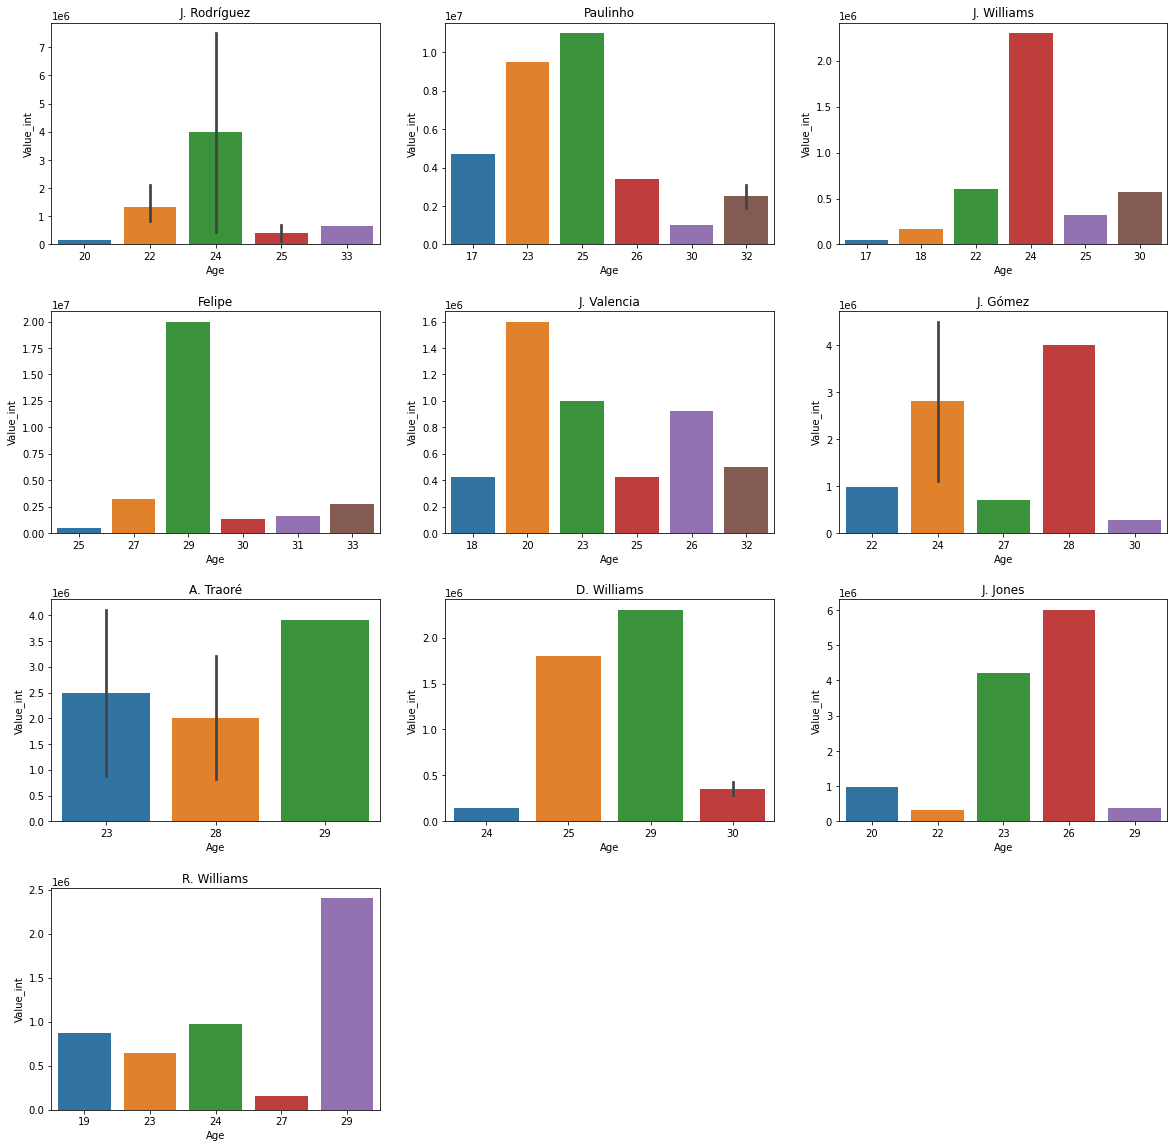

In [21]:
#plotting graph between age ang value of 10 random players
def make_scatter(df):
    names = ('J. Rodríguez','Paulinho','J. Williams','Felipe','J. Valencia','J. Gómez','A. Traoré','D. Williams','J. Jones','R. Williams')
    
    for index, name in enumerate(names):
        plt.subplot(4,3, index+1)
        data = fifadata.loc[fifadata['Name']==name]
        ax = sns.barplot(x = 'Age', y = 'Value_int', data = data)
        plt.title(name)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.3)

make_scatter(fifadata)

From the above plots we can see that players whose age is between 23-30 generally have higher values as compared to others.

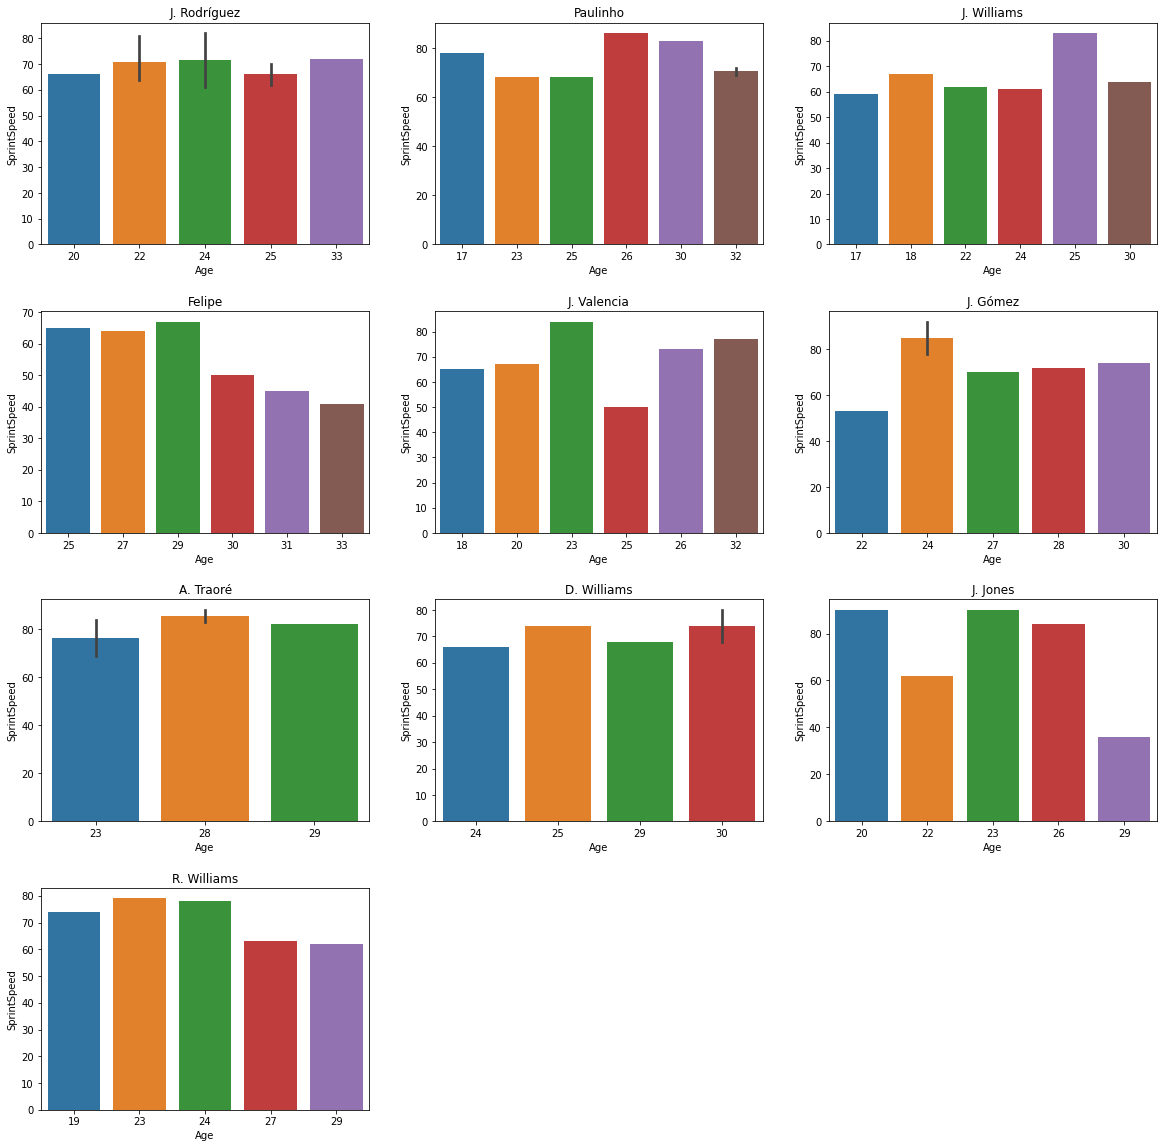

In [22]:
#plotting graph between age and sprintspeed of 10 random players
def make_scatter(df):
    names = ('J. Rodríguez','Paulinho','J. Williams','Felipe','J. Valencia','J. Gómez','A. Traoré','D. Williams','J. Jones','R. Williams')
    
    for index, name in enumerate(names):
        plt.subplot(4,3, index+1)
        data = fifadata.loc[fifadata['Name']==name]
        ax = sns.barplot(x = 'Age', y = 'SprintSpeed', data = data)
        plt.title(name)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.3)

make_scatter(fifadata)

From the above plots we can see that at what age in carrer individual player exhibit maximum pace
example - J.Valencia exhibit maximum pace at age of 23

### 3. What skill sets are helpful in deciding a player's potential? How do the traits contribute to the players' potential? 

From our intution we know (composure, ballcontrol,shotpower,strength,vision ,skillmoves) are the some skills of players which can contribute to potential of player.

From our intitution we know (['Overall','Unnamed: 0','ratio','Value_int','Jersey Number','Wage_int','Special','International Reputation','nor_overall','Age','ID','Release_Clause_int','nor_wage']) are not the skills of player so we need to drop them.

In [23]:
# from our intiution we know these are not the skills of player so we need to drop them
most_correlated = fifadata.corr().abs()['Potential'].sort_values(ascending=False)
most_correlated.drop(['Overall','Unnamed: 0','ratio','Value_int','Jersey Number','Wage_int','Special','International Reputation',
'nor_overall','Age','ID','Release_Clause_int','nor_wage'], inplace =True)
most_correlated

Potential          1.000000
Reactions          0.520090
Composure          0.444690
ShortPassing       0.370710
BallControl        0.353529
Skill Moves        0.352585
Vision             0.350059
LongPassing        0.327245
Dribbling          0.313638
ShotPower          0.287914
Curve              0.278592
LongShots          0.264707
Volleys            0.253330
Crossing           0.247693
Positioning        0.244583
Finishing          0.241756
SprintSpeed        0.238926
Acceleration       0.235132
FKAccuracy         0.230568
Penalties          0.223848
Agility            0.223028
Stamina            0.206223
HeadingAccuracy    0.203994
Aggression         0.179300
Marking            0.169212
Interceptions      0.165053
Weak Foot          0.157624
StandingTackle     0.151542
Balance            0.140546
SlidingTackle      0.137164
Jumping            0.114709
Strength           0.079672
GKKicking          0.057845
GKHandling         0.053468
GKDiving           0.052932
GKReflexes         0

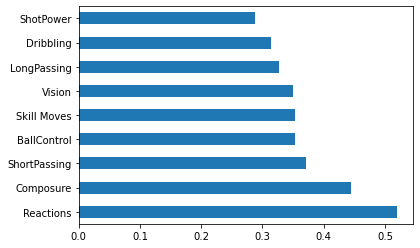

In [24]:
#top skills which decides player potential
top_skills = most_correlated[1:10]
plot = top_skills.plot.barh(stacked=True)

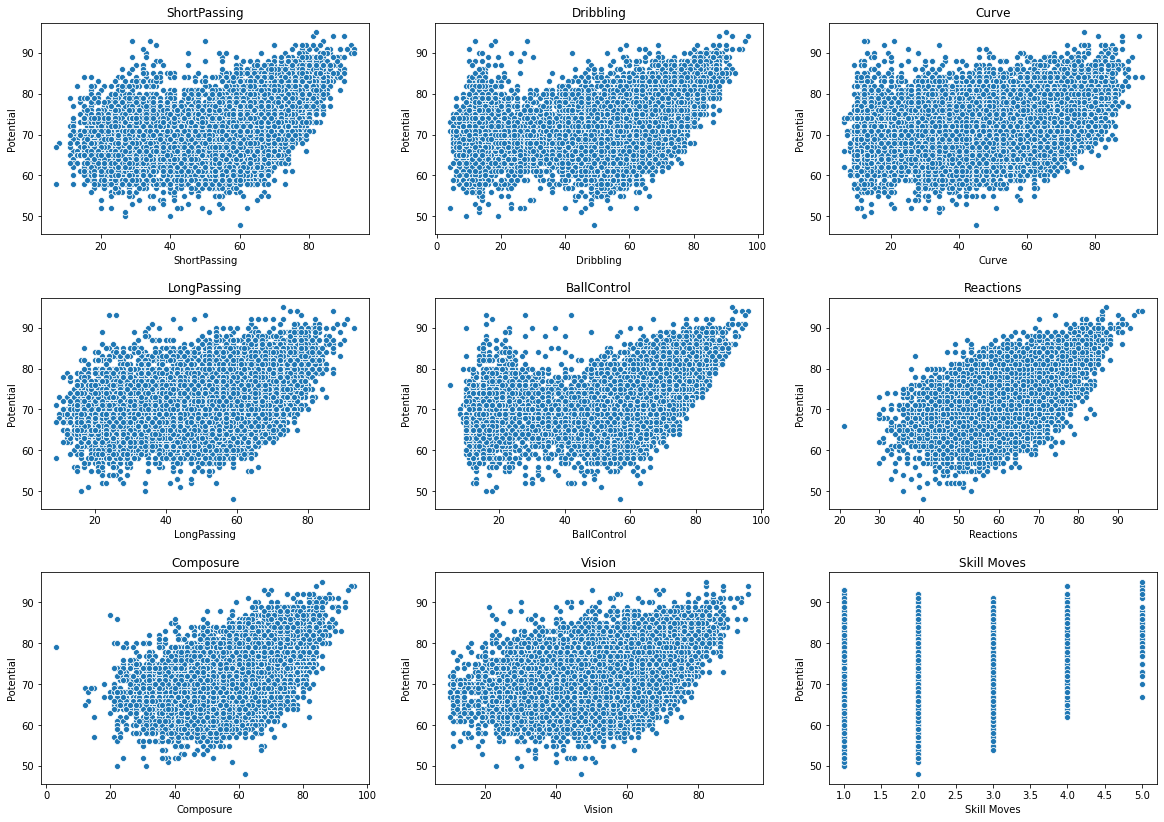

In [25]:
#from these plots we can see how skills contribute to player potential
def make_scatter(df):
    skills = ('ShortPassing','Dribbling','Curve','LongPassing','BallControl','Reactions','Composure','Vision','Skill Moves')
    for index, skills in enumerate(skills):
        plt.subplot(3, 3, index+1)
        ax = sns.scatterplot(x = skills, y = 'Potential', data = fifadata)
        plt.title(skills)
plt.figure(figsize = (20, 14))
plt.subplots_adjust(hspace = 0.3)

make_scatter(fifadata)

From the above plots we see as the skills of a player increases and reach a certain value the potential of the player grows exponentially

### 4. Which features directly contribute to the wages of the players?

In [26]:
# removing extra added columns
fifadata.drop(columns = ['nor_wage','ratio','nor_overall'], inplace = True)
fifadata.shape

(16643, 62)

In [27]:
# most correlated features
most_correlated1 = fifadata.corr().abs()['Wage_int'].sort_values(ascending=False)
most_correlated1.head

<bound method NDFrame.head of Wage_int                    1.000000
Value_int                   0.861528
Release_Clause_int          0.855922
International Reputation    0.677923
Overall                     0.573896
Reactions                   0.500088
Potential                   0.490633
Unnamed: 0                  0.479666
Composure                   0.421709
Special                     0.348278
Vision                      0.316461
ShortPassing                0.297145
LongPassing                 0.280609
BallControl                 0.275948
Skill Moves                 0.259534
Curve                       0.257213
ShotPower                   0.256182
Volleys                     0.253542
LongShots                   0.246352
FKAccuracy                  0.236119
Dribbling                   0.234484
Crossing                    0.233186
Positioning                 0.224421
Penalties                   0.222491
Finishing                   0.214712
ID                          0.206934
Aggressi

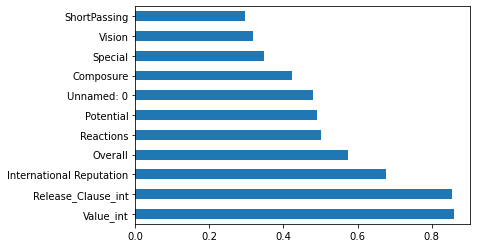

In [28]:
top_features = most_correlated1[1:12]
plot = top_features.plot.barh(stacked=True)

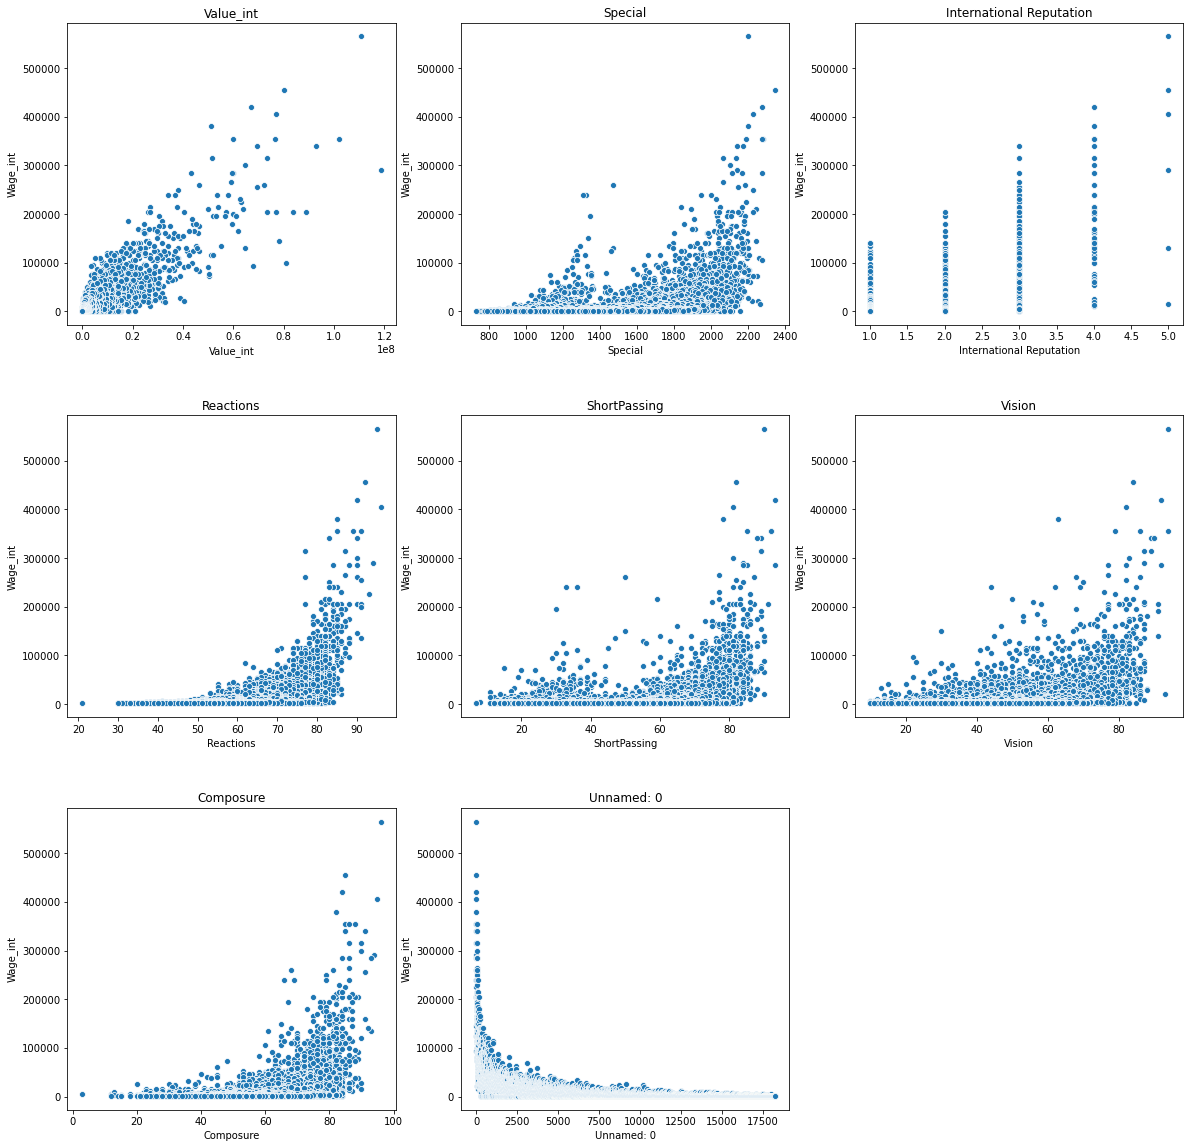

In [29]:
# plotting graph between top features which contribute to wages of players
def make_scatter(df):
    top_features = ('Value_int','Special','International Reputation','Reactions','ShortPassing','Vision', 'Composure','Unnamed: 0')
    
    for index, col in enumerate(top_features):
        plt.subplot(3,3, index+1)
        ax = sns.scatterplot(x = col, y = 'Wage_int', data = fifadata)
        plt.title(col)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.3)

make_scatter(fifadata)

from the above visualiztion we can see features['Value_int','Special','InternationalReputation','Reactions','ShortPassing','Vision', 'Composure']
are the top features which  contibute to wages of players.

From our intituion we know that more the InternationalReputation of a player  more popular the player is which means he will receive more wages.

### 5. What is the age distribution in different clubs? Which club has most players young?

In [30]:
# top clubs with youngest players
young = fifadata.groupby(['Club'])['Age'].mean().sort_values(ascending=True)
young.head(10)

Club
FC Nordsjælland             20.259259
FC Sochaux-Montbéliard      21.400000
Bohemian FC                 21.480000
FC Groningen                21.500000
LOSC Lille                  21.750000
FC Admira Wacker Mödling    21.807692
Envigado FC                 22.035714
Barnsley                    22.076923
Górnik Zabrze               22.153846
Sligo Rovers                22.157895
Name: Age, dtype: float64

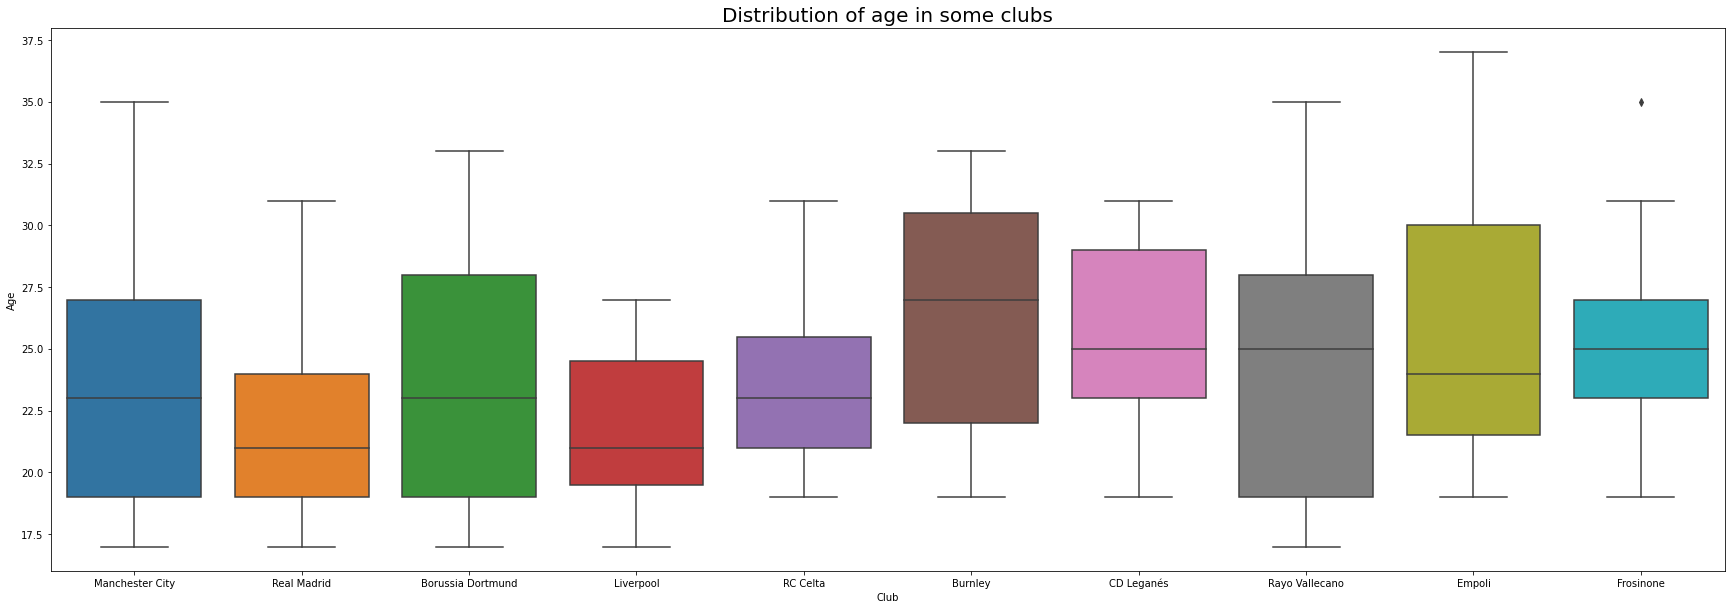

In [31]:
# plotting boxplot betwwen some random clubs
random_clubs = ('Borussia Dortmund', 'Real Madrid', 'Manchester City', 'RC Celta', 'CD Leganés', 'Frosinone',
             'Rayo Vallecano', 'Tottenham Hotspu', 'Empoli', 'Liverpool', 'Burnley')

fifadata_club = fifadata.loc[fifadata['Club'].isin(random_clubs) & fifadata['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
ax = sns.boxplot(x="Club", y="Age", data=fifadata_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

from the above boxplots betewen some random clubs we can see  club real madrid have the most young players

# Part - 3
## UK Road Accidents Data


The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

### 1. The very first step should be to merge all the 3 subsets of the data.

In [3]:
#concatenating data
accident =pd.concat([accident1, accident2,accident3], axis=0)
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [4]:
#making copy of a dataset
accident1 = accident.copy()

### 2. What are the number of casualties in each day of the week? Sort them in descending order. 

In [5]:
top_casualities = accident.groupby(['Day_of_Week'])['Number_of_Casualties'].sum().sort_values(ascending=False)
top_casualities.head

<bound method NDFrame.head of Day_of_Week
6    331934
5    299044
4    297756
3    294476
7    285261
2    284043
1    239532
Name: Number_of_Casualties, dtype: int64>

### 3. On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?

In [60]:
top = accident.groupby(['Day_of_Week'])['Speed_limit'].max()
top1 = accident.groupby(['Day_of_Week'])['Speed_limit'].min()
print(top)
print(top1) 

Day_of_Week
1    70
2    70
3    70
4    70
5    70
6    70
7    70
Name: Speed_limit, dtype: int64
Day_of_Week
1    10
2    10
3    10
4    20
5    10
6    10
7    10
Name: Speed_limit, dtype: int64


### 4. What is the importance of Light and Weather conditions in predicting accident severity? What does your intuition say and what does the data portray?

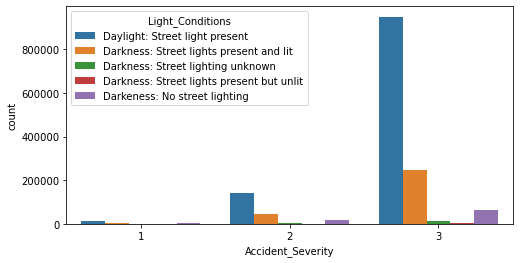

In [61]:
#weather conditions
plt.figure(figsize= (8,4))
sns.countplot(x='Accident_Severity', hue="Light_Conditions", data = accident)
plt.show()

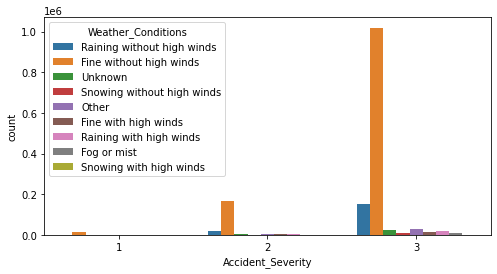

In [62]:
#light conditions
plt.figure(figsize= (8,4))
sns.countplot(x='Accident_Severity', hue="Weather_Conditions", data = accident)
plt.show()

from our intitution point of view lightining conditions (Light_Conditions_Darkness: Street lighting unknow,Light_Conditions_Darkness: Street lights present but unlit) and weather conditions (Weather_Conditions_Raining with high winds,Weather_Conditions_Snowing with high winds) should have high correlation with the accident severity but our data potrays 
different ascepts.

### 5. To predict the severity of the accidents which columns do you think are unnecessary and should be dropped before implementing a regression model. Support your statement using relevant plots and hypotheses derived from them.

In [5]:
#calcuating null value percentage in each column
null_var = accident.isnull().sum()/accident.shape[0] *100
null_var

Accident_Index                                   0.000000
Location_Easting_OSGR                            0.006715
Location_Northing_OSGR                           0.006715
Longitude                                        0.006715
Latitude                                         0.006715
Police_Force                                     0.000000
Accident_Severity                                0.000000
Number_of_Vehicles                               0.000000
Number_of_Casualties                             0.000000
Date                                             0.000000
Day_of_Week                                      0.000000
Time                                             0.007778
Local_Authority_(District)                       0.000000
Local_Authority_(Highway)                        0.000000
1st_Road_Class                                   0.000000
1st_Road_Number                                  0.000000
Road_Type                                        0.000000
Speed_limit   

In [6]:
# columns containg null value percentage greater than 40 percent
drop_columns  = null_var[null_var >40].keys()
drop_columns

Index(['Junction_Detail', 'Junction_Control'], dtype='object')

In [7]:
#dropping columns containg null value percentage > 40%
accident = accident.drop(columns=drop_columns)
accident

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [8]:
#dropping null values
accident.dropna(inplace = True)

In [9]:
#drop accident index column since it contains all unique value so it will not have any effect on output
accident.drop(['Accident_Index'],inplace=True,axis=1)
accident.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

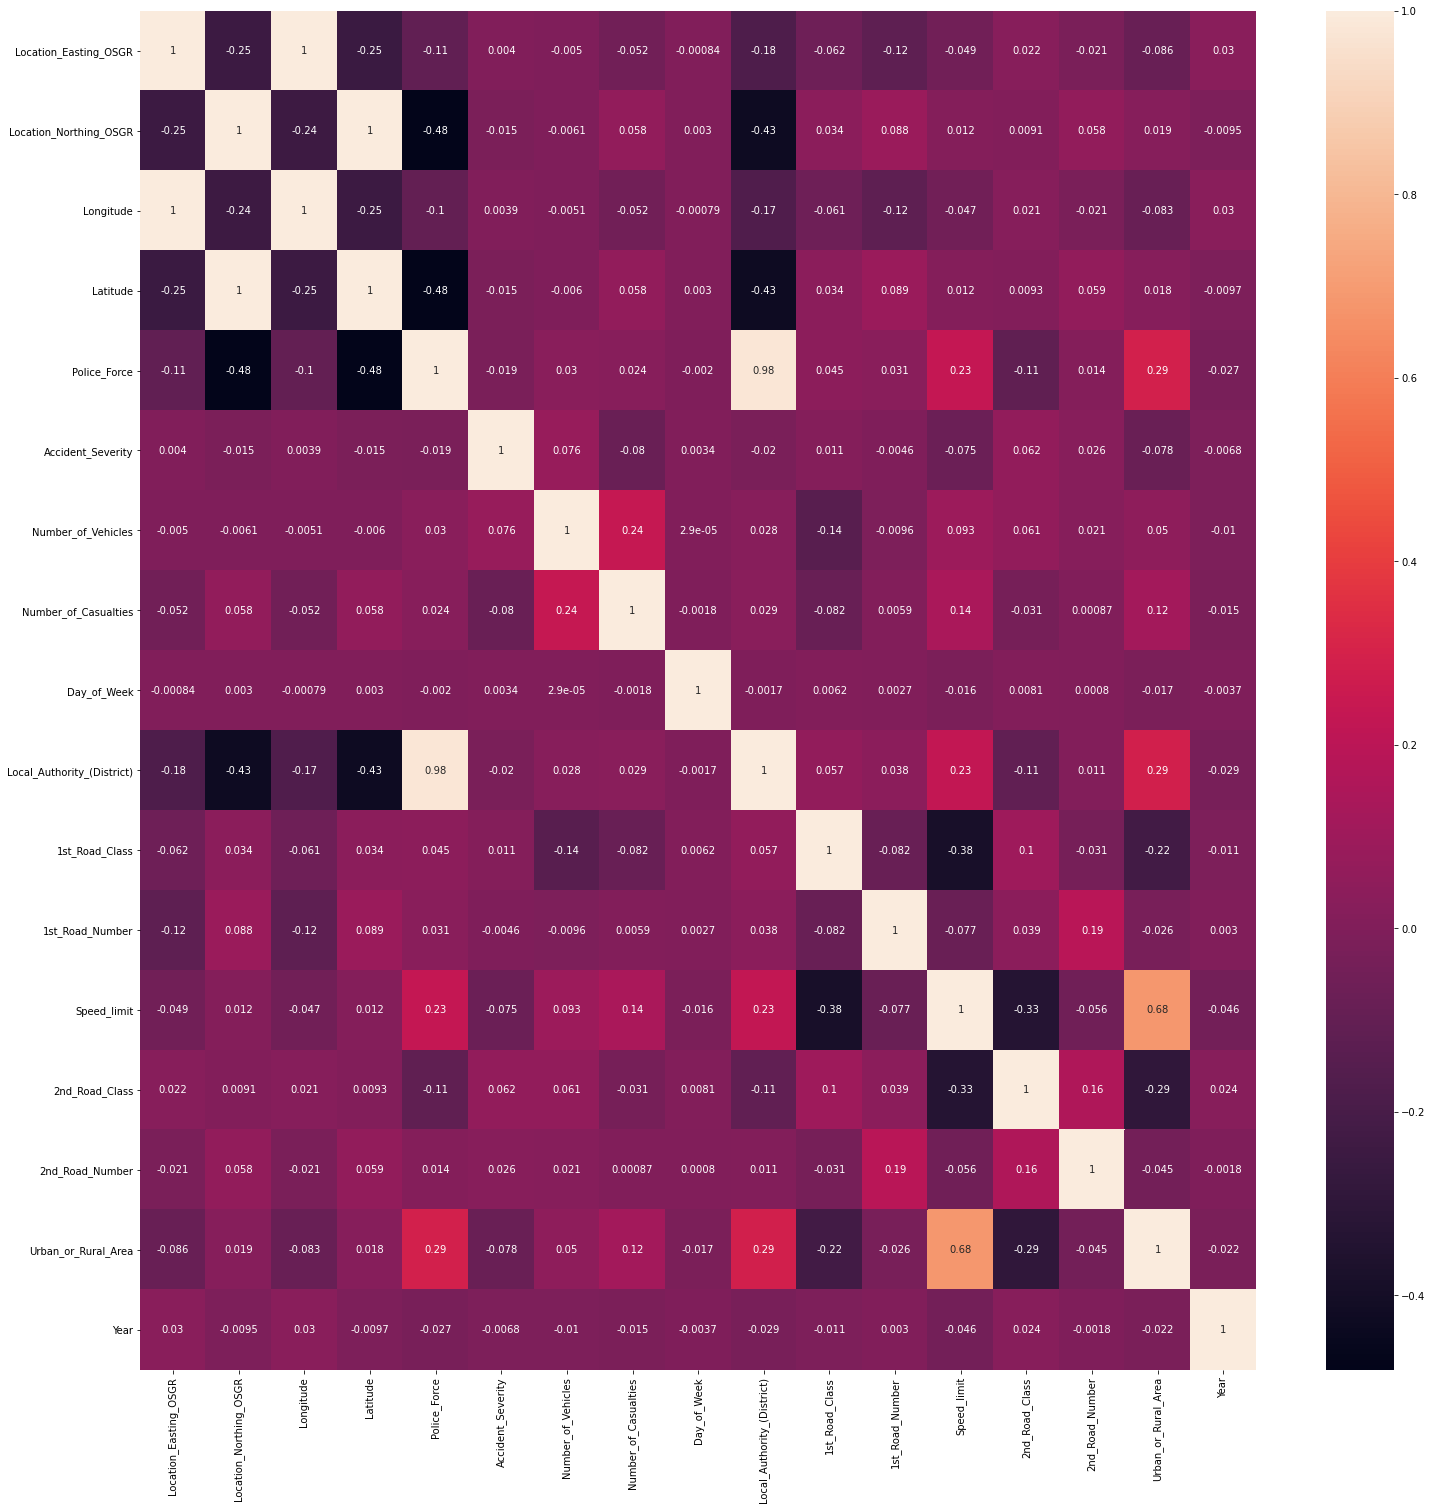

In [26]:
#plotting heat map to show correlation
corr = accident.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot = True)

From the above hypothesis and plot we can drop  ['Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)','Urban_or_Rural_Area','Police_Force'] columns since these columns are highly correlated with other columns so their effect can be derived from other columns so to train a model we can drop these columns to have better results and accuracy.

In [10]:
#dropping features which are highly correlated sice their effect can be derived from another features
accident.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)','Urban_or_Rural_Area','Police_Force'],inplace=True,axis=1)
accident.columns

Index(['Longitude', 'Latitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [11]:
#dropping date and time and year as they will not play an imprtant role in predicting accident severity
accident.drop(['Year','Date','Time'],inplace =True,axis =1)

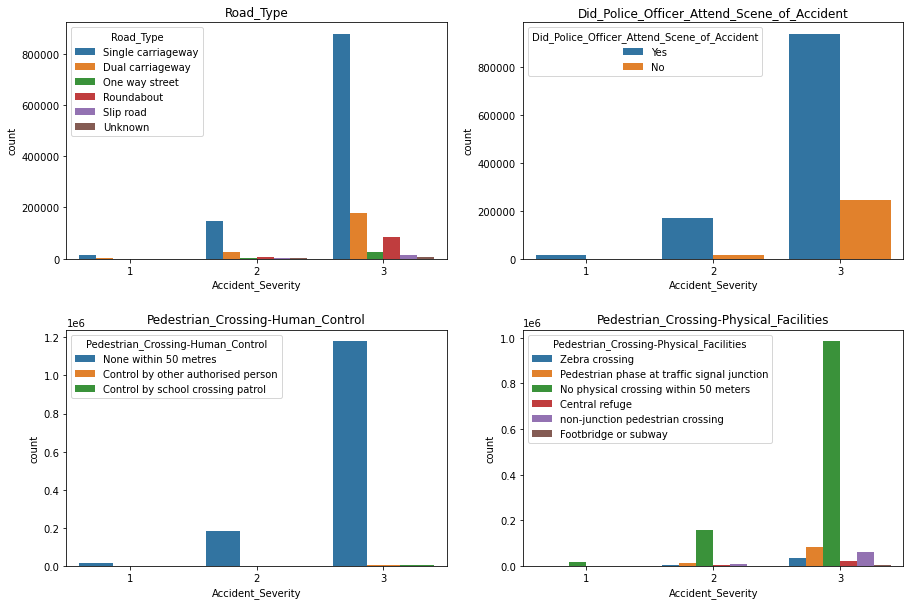

In [12]:
#plotting some categorical features to show how they are useful in predicting accident severity
def make_scatter(df): 
    features = ('Road_Type','Did_Police_Officer_Attend_Scene_of_Accident','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'
               )
    for index, col in enumerate(features):
        plt.subplot(2,2, index+1)
        ax = sns.countplot(x = 'Accident_Severity', hue = col, data = accident)
        plt.title(col)
plt.figure(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.3)

make_scatter(accident)

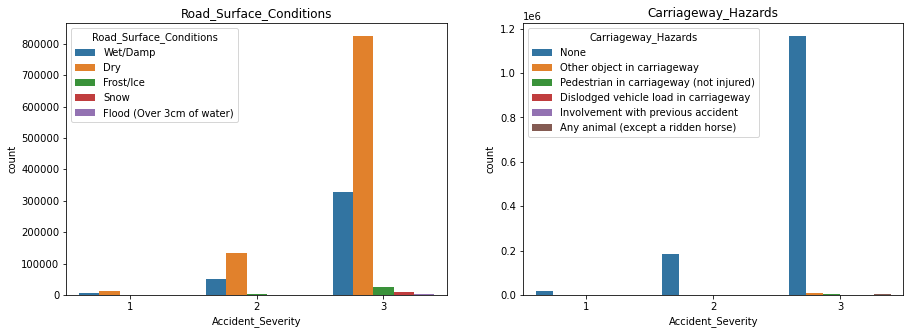

In [13]:
def make_scatter(df): 
    features = ('Road_Surface_Conditions','Carriageway_Hazards')
    for index, col in enumerate(features):
        plt.subplot(1,2, index+1)
        ax = sns.countplot(x = 'Accident_Severity', hue = col, data = accident)
        plt.title(col)
plt.figure(figsize = (15, 5))
plt.subplots_adjust(hspace = 0.3)

make_scatter(accident)

In [14]:
# these column are not important in predicting accident severity
accident.drop(['LSOA_of_Accident_Location'],inplace =True,axis =1)
accident

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
0,-0.191170,51.489096,2,1,1,3,E09000020,3,3218,Single carriageway,...,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Yes
1,-0.211708,51.520075,3,1,1,4,E09000020,4,450,Dual carriageway,...,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes
2,-0.206458,51.525301,3,2,1,5,E09000020,5,0,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes
3,-0.173862,51.482442,3,1,1,6,E09000020,3,3220,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
4,-0.156618,51.495752,3,1,1,2,E09000020,6,0,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455903,-3.265712,52.531575,3,1,3,7,W06000023,4,4389,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,Yes
455904,-3.282677,52.511702,3,1,2,1,W06000023,3,489,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,None,None,Yes
455905,-3.259644,52.828952,3,2,1,3,W06000023,4,4396,Single carriageway,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,Yes
455906,-3.410628,51.944879,3,2,1,1,W06000023,3,470,Roundabout,...,3,40,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Unknown,Wet/Damp,None,None,No


### 6. Implement a basic Logistic Regression Model using scikit learn with cross validation = 5, where you predict the severity of the accident (Accident_Severity). Note that here your goal is not to tune appropriate hyperparameters, but to figure out what features will be best to use.

In [15]:
# label encoding the categorical features
from sklearn import preprocessing
for f in accident.columns:
    if accident[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(accident[f].values))
        accident[f] = lbl.transform(list(accident[f].values)) 
accident.dtypes

Longitude                                      float64
Latitude                                       float64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Local_Authority_(Highway)                        int64
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian_Crossing-Human_Control                int64
Pedestrian_Crossing-Physical_Facilities          int64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Special_Co

In [16]:
# dropping the column fron dataset that is to be predicted
y_train = accident['Accident_Severity'].copy()
y_train

0         2
1         3
2         3
3         3
4         3
         ..
455903    3
455904    3
455905    3
455906    3
455907    2
Name: Accident_Severity, Length: 1391720, dtype: int64

In [17]:
#dropping column to be predicted
X_train = accident.drop('Accident_Severity', axis=1)

In [18]:
#splitting training and test data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(932452, 20) (459268, 20) (932452,) (459268,)


In [19]:
#traing model using Logistic regression with cross validation
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(max_iter=100,cv=5, random_state=0).fit(X_train1, y_train1)
y = model.predict(X_test1)
y.shape

C:\Users\shivam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shivam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

(459268,)

In [20]:
#calcuating accuracy of model
from sklearn import metrics
metrics.accuracy_score(y_test1, y)

0.8534385152024526